<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      415 non-null    object
 1   sex         415 non-null    object
 2   age         415 non-null    object
 3   address     415 non-null    object
 4   famsize     415 non-null    object
 5   Pstatus     415 non-null    object
 6   Medu        415 non-null    object
 7   Fedu        415 non-null    object
 8   Mjob        415 non-null    object
 9   Fjob        415 non-null    object
 10  reason      415 non-null    object
 11  guardian    415 non-null    object
 12  traveltime  415 non-null    object
 13  studytime   415 non-null    object
 14  failures    415 non-null    object
 15  schoolsup   415 non-null    object
 16  famsup      415 non-null    object
 17  paid        415 non-null    object
 18  activities  415 non-null    object
 19  nursery     415 non-null    object
 20  higher    

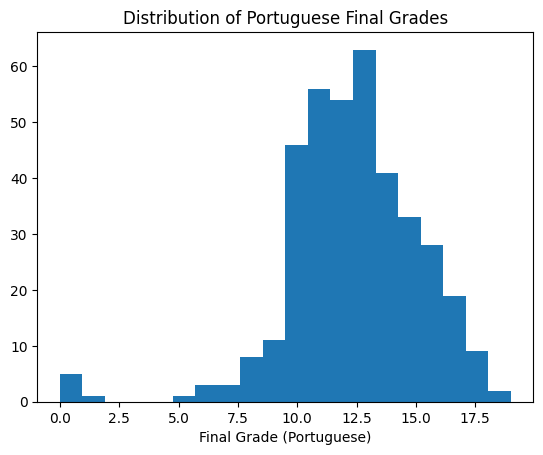

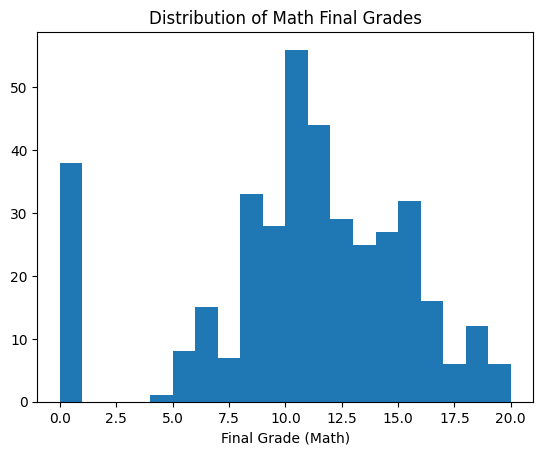

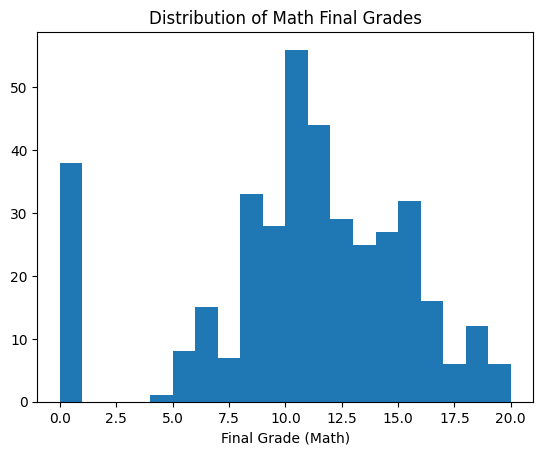

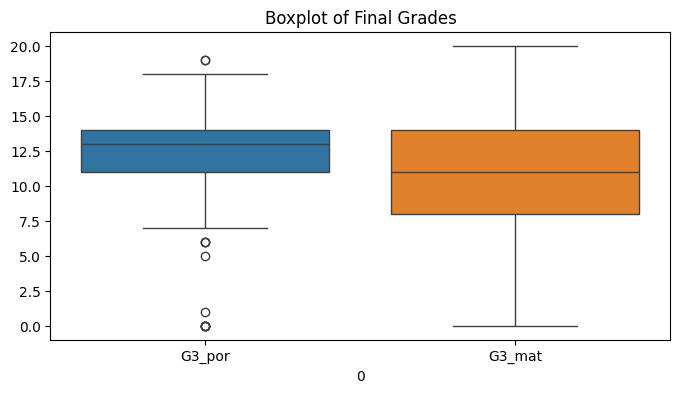

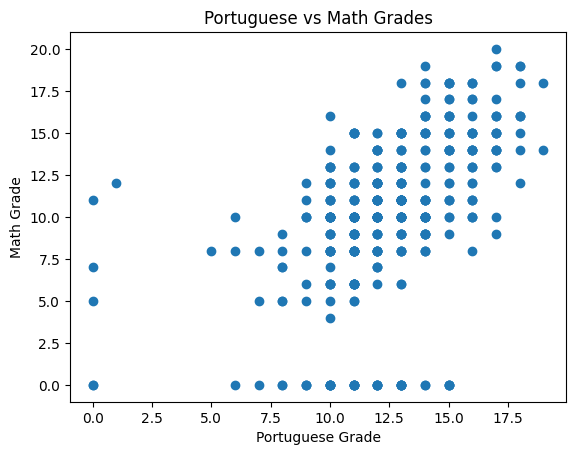

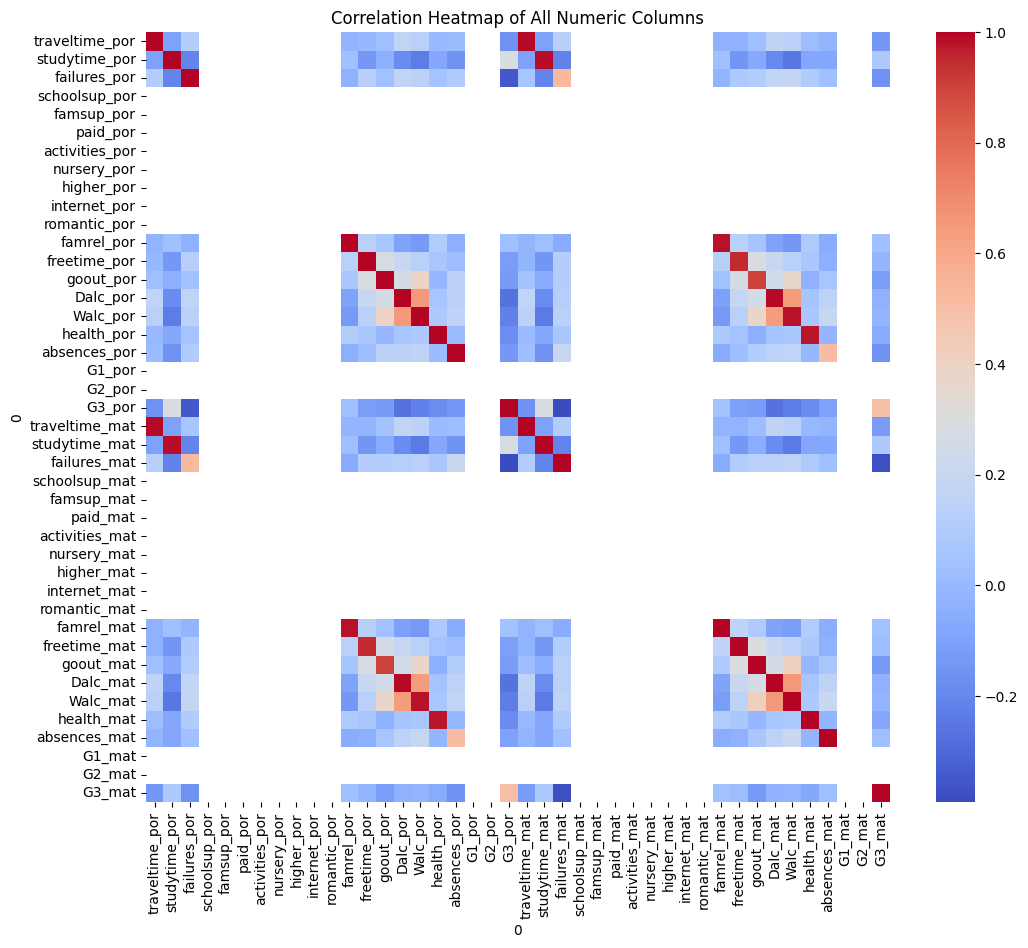

Average Portuguese Grade: 12.509138381201044
Average Math Grade: 10.347258485639687
sex
"F"    202
"M"    181
Name: count, dtype: int64


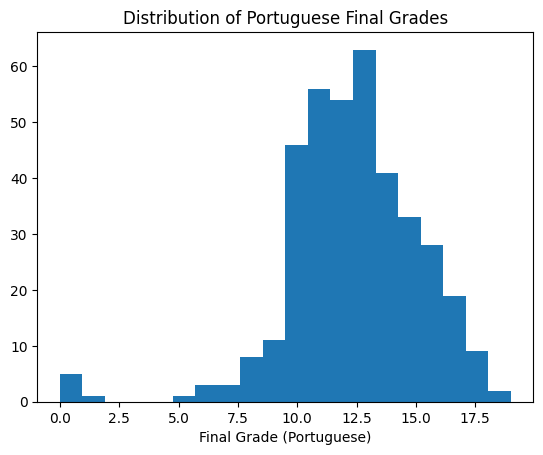

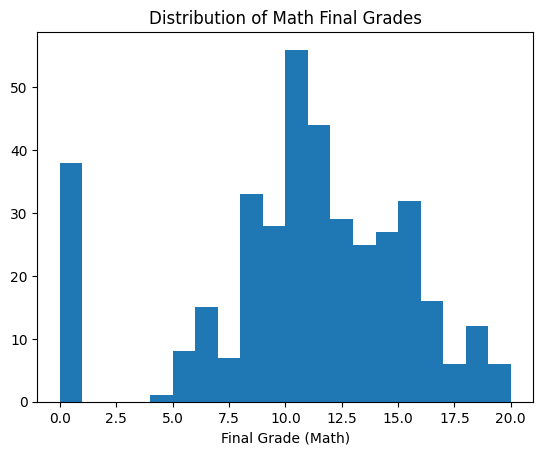

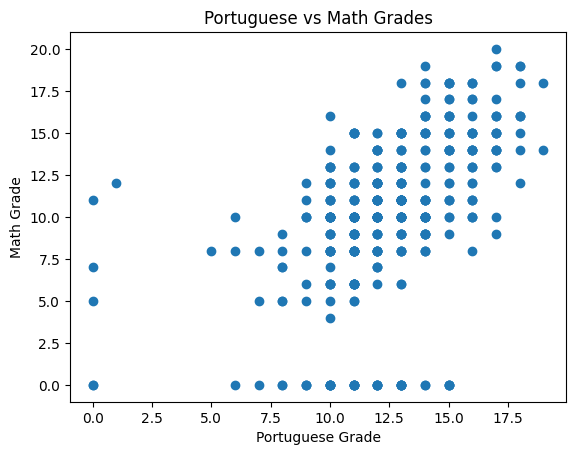

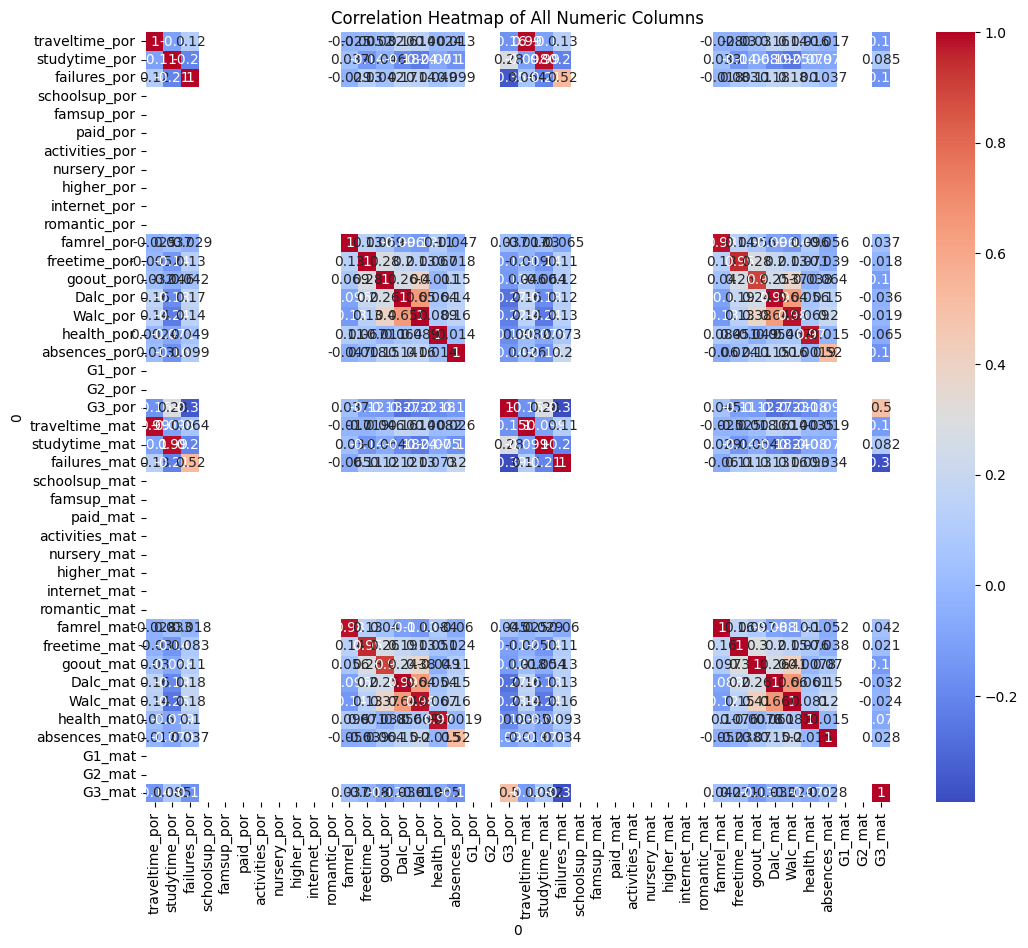

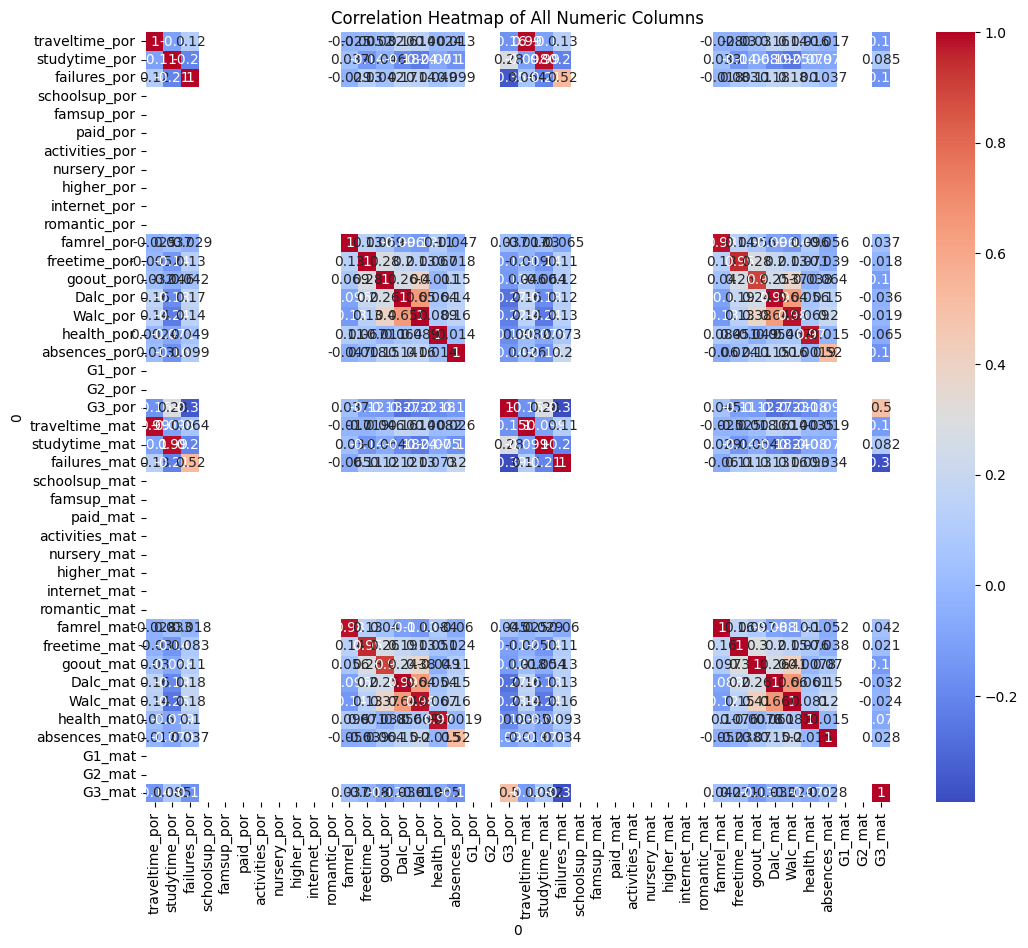

Null values in mat dataframe:
0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Null values in por dataframe:
0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime  

In [70]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define df_merged
mat = pd.read_csv('/content/drive/MyDrive/Study_Based_Recommendation/student-mat.csv', header=None, encoding='utf-8')
por = pd.read_csv('/content/drive/MyDrive/Study_Based_Recommendation/student-por.csv', header=None, encoding='utf-8')

# Split the single column into multiple columns using the semicolon delimiter
mat = mat[0].str.split(';', expand=True)
por = por[0].str.split(';', expand=True)

# Set the first row as the header
mat.columns = mat.iloc[0]
mat = mat[1:].reset_index(drop=True)
mat.info()
por.columns = por.iloc[0]
por = por[1:].reset_index(drop=True)
por.info()

merge_cols = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
]
df_merged = pd.merge(por, mat, on=merge_cols, how="inner", suffixes=("_por", "_mat"))

df_merged = df_merged.drop_duplicates()
df_merged = df_merged.fillna(0)
df_merged = df_merged.drop_duplicates()
df_merged = df_merged.fillna(0)

# Convert columns to numeric, coercing errors

for col in df_merged.columns:
    if col not in merge_cols: # Exclude merge columns from numeric conversion
        df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')


print(df_merged.describe())
print(df_merged['sex'].value_counts())
plt.hist(df_merged['G3_por'], bins=20)
plt.xlabel("Final Grade (Portuguese)")
plt.title("Distribution of Portuguese Final Grades")
plt.show()
plt.hist(df_merged['G3_mat'], bins=20)
plt.xlabel("Final Grade (Math)")
plt.title("Distribution of Math Final Grades")
plt.show()
plt.hist(df_merged['G3_mat'], bins=20)
plt.xlabel("Final Grade (Math)")
plt.title("Distribution of Math Final Grades")
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(data=df_merged[['G3_por','G3_mat']])
plt.title("Boxplot of Final Grades")
plt.show()
plt.scatter(df_merged['G3_por'], df_merged['G3_mat'])
plt.xlabel("Portuguese Grade")
plt.ylabel("Math Grade")
plt.title("Portuguese vs Math Grades")
plt.show()
plt.figure(figsize=(12,10))
sns.heatmap(df_merged.select_dtypes(include=np.number).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

# Mean (average) for Portuguese and Math grades


mean_por = df_merged['G3_por'].mean()
mean_mat = df_merged['G3_mat'].mean()

print("Average Portuguese Grade:", mean_por)
print("Average Math Grade:", mean_mat)

# Mean (average) for Portuguese and Math grades

mean_por = df_merged['G3_por'].mean()
mean_mat = df_merged['G3_mat'].mean()

# Count of male and female students

gender_counts = df_merged['sex'].value_counts()
print(gender_counts)

# Histogram of Portuguese Grades

plt.hist(df_merged['G3_por'], bins=20)
plt.xlabel("Final Grade (Portuguese)")
plt.title("Distribution of Portuguese Final Grades")
plt.show()

# Histogram of Math Grades

plt.hist(df_merged['G3_mat'], bins=20)
plt.xlabel("Final Grade (Math)")
plt.title("Distribution of Math Final Grades")
plt.show()
plt.scatter(df_merged['G3_por'], df_merged['G3_mat'])
plt.xlabel("Portuguese Grade")
plt.ylabel("Math Grade")
plt.title("Portuguese vs Math Grades")
plt.show()
import seaborn as sns  # If not already imported

plt.figure(figsize=(12,10))
sns.heatmap(df_merged.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()
import seaborn as sns  # If not already imported

plt.figure(figsize=(12,10))
sns.heatmap(df_merged.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()

#Duplicates

mat = mat.drop_duplicates()
por=por.drop_duplicates()

 # Non-null Values

print("Null values in mat dataframe:")
print(mat.isnull().sum())
print("\nNull values in por dataframe:")
print(por.isnull().sum())

In [71]:
print("Null values in mat dataframe:")
print(mat.isnull().sum())

print("\nNull values in por dataframe:")
print(por.isnull().sum())

Null values in mat dataframe:
0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Null values in por dataframe:
0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime  

In [72]:
merge_cols = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian'
]
df_merged = pd.merge(por, mat, on=merge_cols, how="inner", suffixes=("_por", "_mat"))
display(df_merged.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10
